# Image Classification

Nama : Kevin Akbar Adhiguna

NPM : 140810170055

## Introducing Dependencies

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
import os
import numpy as np
import matplotlib.pyplot as plt

## Data Preprocessing

### Download Cifar-10 dataset

In [12]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

### Print the Size of the Dataset

In [13]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [14]:
print(y_train[0])

[6]


### Convert the Category label into onehot encoding

In [15]:
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)
y_train[0]

array([6], dtype=uint8)

### Show the first 9 images

Create an image tag list

In [16]:
category_dict = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

Show the first 9 images and their labels

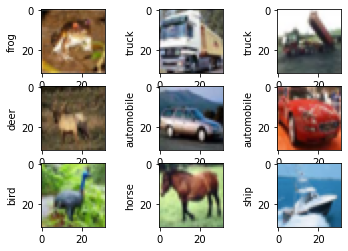

In [17]:
plt.figure()
for i in range(9):
  # create a figure with 9 subplots
  plt.subplot(3, 3, i+1)
  # show an image
  plt.imshow(x_train[i])
  # show the label
  plt.ylabel(category_dict[y_train[i][0]])
plt.show()

Pixel Normalization

In [18]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## Model Creation

In [19]:
def CNN_classification_model(input_size = x_train.shape[1:]):
  model = Sequential()
  # the first block with 2 convolutional layers and 1 maxpooling layer
  '''Conv1 with 32 3*3 kernels padding="same": it applies zero padding to the input image so that the input image gets fully covered by the filter and specified stride. It is called SAME because, for stride 1 , the output will be the same as the input. output: 32*32*32'''
  model.add(Conv2D(32, (3,3), padding='same', input_shape=input_size))
  # relu activation function
  model.add(Activation('relu'))
  # Conv2
  model.add(Conv2D(32, (3,3)))
  model.add(Activation('relu'))
  # Maxpooling
  model.add(MaxPooling2D(pool_size=(2,2), strides=1))

  # the second block
  model.add(Conv2D(64, (3,3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3,3)))
  model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=(2,2)))

  # Before sending a feature map into a fully connected network, it should be flattened into a column vector
  model.add(Flatten())
  # Fully Connected Layer
  model.add(Dense(128))
  model.add(Activation('relu'))
  # Dropout Layer. Every Neuron is set to 0 with a probability of 0.25
  model.add(Dropout(0.25))
  model.add(Dense(num_classes))
  # Map the score of each class into a probability
  model.add(Activation('softmax'))

  opt = keras.optimizers.Adam(lr=0.0001)

  model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

## Model Training

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = CNN_classification_model()

model_name = "final_cifar10.h5"
model_checkpoint = ModelCheckpoint(model_name, monitor='loss', verbose=1, save_best_only=True)

# load pretrained models
trained_weights_path = 'cifar10_weights.h5'
if os.path.exists(trained_weights_path):
  model.load_weights(trained_weights_path, by_name=True)

# train
model.fit(x_train, y_train, batch_size=32, epochs=10, callbacks=[model_checkpoint], verbose=1)

Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 1.6488 - accuracy: 0.3994
Epoch 00001: loss improved from inf to 1.64880, saving model to final_cifar10.h5
1563/1563 [==============================] - 472s 302ms/step - loss: 1.6488 - accuracy: 0.3994
Epoch 2/10
1563/1563 [==============================] - ETA: 0s - loss: 1.3217 - accuracy: 0.5287
Epoch 00002: loss improved from 1.64880 to 1.32171, saving model to final_cifar10.h5
1563/1563 [==============================] - 475s 304ms/step - loss: 1.3217 - accuracy: 0.5287
Epoch 3/10
1563/1563 [==============================] - ETA: 0s - loss: 1.1833 - accuracy: 0.5800
Epoch 00003: loss improved from 1.32171 to 1.18332, saving model to final_cifar10.h5
1563/1563 [==============================] - 471s 302ms/step - loss: 1.1833 - accuracy: 0.5800
Epoch 4/10
1563/1563 [==============================] - ETA: 0s - loss: 1.0878 - accuracy: 0.6174
Epoch 00004: loss improved from 1.18332 to 1.08777, saving model to fina

## Model Evaluation

In [21]:
new_model = CNN_classification_model()
new_model.load_weights('final_cifar10.h5')

model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 23s 73ms/step - loss: 0.8511 - accuracy: 0.7033


[0.8511124849319458, 0.7032999992370605]

Predict on a single image

In [22]:
# output the possibility of each class
new_model.predict(x_test[0:1])

array([[1.1592961e-03, 7.0483855e-04, 1.8452335e-02, 8.7370640e-01,
        3.9819032e-03, 8.0570631e-02, 1.8788722e-03, 1.2814555e-03,
        1.6351089e-02, 1.9132266e-03]], dtype=float32)

In [23]:
# output the predicted label
new_model.predict_classes(x_test[1:2])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([8])

Plot the first 4 images in the test set and their corresponding predicted labels.

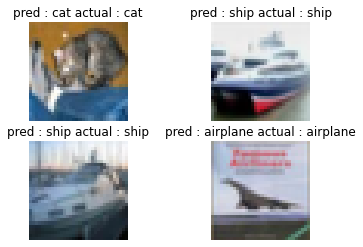

In [24]:
# label list
pred_list = []

plt.figure()
for i in range(0,4):
  plt.subplot(2, 2, i+1)
  # plot
  plt.imshow(x_test[i])
  # predict
  pred = new_model.predict_classes(x_test[0:10])
  pred_list.append(pred)
  # display actual and predicted labels of images
  plt.title("pred : "+category_dict[pred[i]]+" actual : "+category_dict[y_test[i][0]])
  plt.axis('off')
plt.show()